In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

dataset = pd.read_csv('owid-co2-data.csv')

In [6]:
dataset.head() #显示数据集的前5行。 如果您想查看更多行，调整括号中数字即可。例如dataset.head(10)查看前10行 

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [7]:
dataset.shape #显示数据集的行数和列数

(25204, 58)

In [10]:
df = dataset.drop(columns=['consumption_co2','co2_growth_prct','co2_growth_abs'])
df.head()

,iso_code,country,year,co2,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,0.002,NaN,0.0,0.015,0.0,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,0.011,NaN,0.0,0.099,0.0,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,0.012,NaN,0.0,0.191,0.0,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.012,NaN,0.0,0.282,0.0,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,0.013,NaN,0.0,0.388,0.0,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [11]:
df1 = df[['country', 'year','co2','coal_co2','cement_co2', 'flaring_co2','gas_co2','oil_co2', 'other_industry_co2','methane', 'nitrous_oxide', 'population' ]]
df1

,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,methane,nitrous_oxide,population
0,Afghanistan,1949,0.015,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624058.0
1,Afghanistan,1950,0.084,0.021,NaN,NaN,NaN,0.063,NaN,NaN,NaN,7752117.0
2,Afghanistan,1951,0.092,0.026,NaN,NaN,NaN,0.066,NaN,NaN,NaN,7840151.0
3,Afghanistan,1952,0.092,0.032,NaN,NaN,NaN,0.060,NaN,NaN,NaN,7935996.0
4,Afghanistan,1953,0.106,0.038,NaN,NaN,NaN,0.068,NaN,NaN,NaN,8039684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25199,Zimbabwe,2016,10.738,6.959,0.639,NaN,NaN,3.139,NaN,11.92,6.55,14030338.0
25200,Zimbabwe,2017,9.582,5.665,0.678,NaN,NaN,3.239,NaN,NaN,NaN,14236599.0
25201,Zimbabwe,2018,11.854,7.101,0.697,NaN,NaN,4.056,NaN,NaN,NaN,14438812.0
25202,Zimbabwe,2019,10.949,6.020,0.697,NaN,NaN,4.232,NaN,NaN,NaN,14645473.0


In [13]:
final_df = df1[df1['year']>1995]
final_df

,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,methane,nitrous_oxide,population
47,Afghanistan,1996,1.165,0.007,0.047,0.022,0.308,0.780,NaN,9.93,3.29,18853444.0
48,Afghanistan,1997,1.084,0.004,0.047,0.022,0.283,0.728,NaN,10.60,3.59,19357126.0
49,Afghanistan,1998,1.029,0.004,0.047,0.022,0.265,0.691,NaN,11.10,3.88,19737770.0
50,Afghanistan,1999,0.810,0.004,0.047,0.022,0.242,0.495,NaN,11.87,4.15,20170847.0
51,Afghanistan,2000,0.758,0.004,0.010,0.022,0.224,0.498,NaN,10.59,3.62,20779957.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25199,Zimbabwe,2016,10.738,6.959,0.639,NaN,NaN,3.139,NaN,11.92,6.55,14030338.0
25200,Zimbabwe,2017,9.582,5.665,0.678,NaN,NaN,3.239,NaN,NaN,NaN,14236599.0
25201,Zimbabwe,2018,11.854,7.101,0.697,NaN,NaN,4.056,NaN,NaN,NaN,14438812.0
25202,Zimbabwe,2019,10.949,6.020,0.697,NaN,NaN,4.232,NaN,NaN,NaN,14645473.0


In [14]:
final_df = final_df[(final_df['country'].isin(['United States', 'Africa', 'Antartica','South Korea', 'Bangladesh', 'Canada', 'Germany', 'Brazil', 'Argentina','Japan', 'India', 'United Kingdom', 'Saudi Arabia', 'China', 'Australia','Russia']) & (final_df['co2'] > 0))]
final_df

,country,year,co2,coal_co2,cement_co2,flaring_co2,gas_co2,oil_co2,other_industry_co2,methane,nitrous_oxide,population
184,Africa,1996,783.254,353.130,27.681,23.787,108.019,270.637,NaN,NaN,NaN,735361106.0
185,Africa,1997,812.903,360.837,28.350,23.394,95.205,305.117,NaN,NaN,NaN,753737584.0
186,Africa,1998,838.022,355.514,29.203,22.961,112.712,317.632,NaN,NaN,NaN,772437161.0
187,Africa,1999,830.397,366.523,30.311,23.569,114.377,295.618,NaN,NaN,NaN,791504165.0
188,Africa,2000,886.562,370.247,31.510,55.282,114.350,315.173,NaN,NaN,NaN,810984230.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24063,United States,2016,5248.024,1379.744,39.439,51.908,1502.475,2246.524,27.933,629.38,251.7,323015992.0
24064,United States,2017,5207.751,1338.667,40.324,56.186,1480.059,2265.326,27.190,NaN,NaN,325084758.0
24065,United States,2018,5375.491,1283.532,38.971,71.008,1641.041,2316.811,24.128,NaN,NaN,327096263.0
24066,United States,2019,5255.816,1098.854,40.896,84.510,1694.894,2313.372,23.291,NaN,NaN,329064917.0


In [15]:
final_df.isnull().sum()

country                 0
year                    0
co2                     0
coal_co2               25
cement_co2              0
flaring_co2            77
gas_co2                 0
oil_co2                 0
other_industry_co2    125
methane                81
nitrous_oxide          81
population              0
dtype: int64

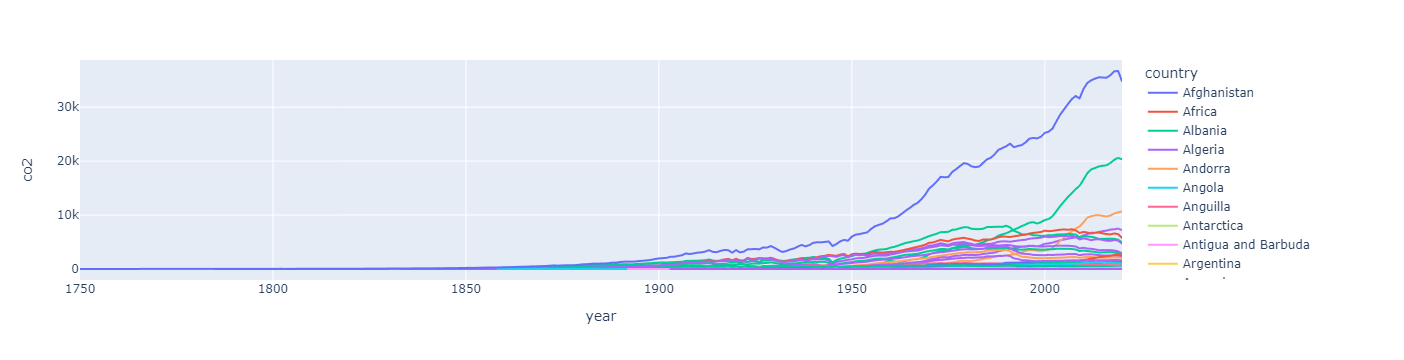

In [26]:
fig = px.line(dataset, x = 'year', y = 'co2', color='country')
fig.show()

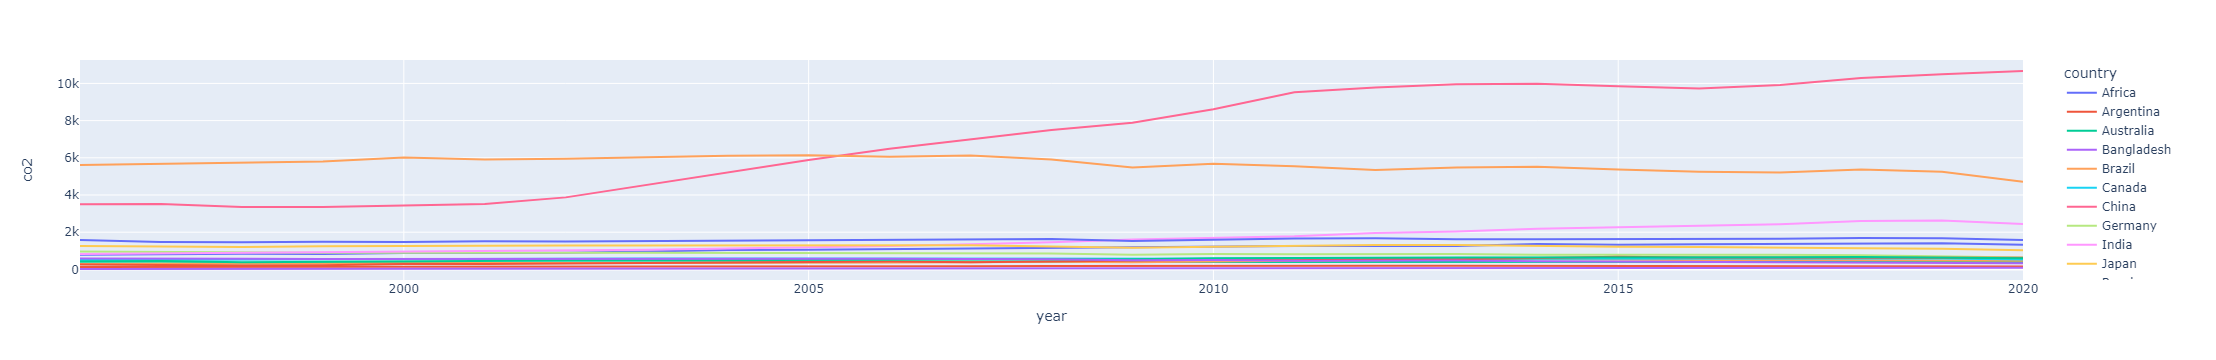

In [24]:
fig = px.line(final_df, x = 'year', y = 'co2', color='country')

fig.show()

In [20]:
continent_data =  dataset[(dataset['country'].isin(['Europe', 'Africa', 'North America', 'South America', 'Oceania', 'Asia'])) & (dataset['co2'] > 0)]
continent_data.shape

(1111, 58)

In [21]:
continent_data.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
72,NaN,Africa,1884,0.022,NaN,NaN,NaN,NaN,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,130848603.0,NaN,NaN,NaN,NaN
73,NaN,Africa,1885,0.037,NaN,66.67,0.015,NaN,0.008,NaN,...,NaN,NaN,NaN,NaN,NaN,131563803.0,NaN,NaN,NaN,NaN
74,NaN,Africa,1886,0.048,NaN,30.00,0.011,NaN,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,132284841.0,NaN,NaN,NaN,NaN
75,NaN,Africa,1887,0.048,NaN,0.00,0.000,NaN,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,133011765.0,NaN,NaN,NaN,NaN
76,NaN,Africa,1888,0.081,NaN,69.23,0.033,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,133744628.0,NaN,NaN,NaN,NaN


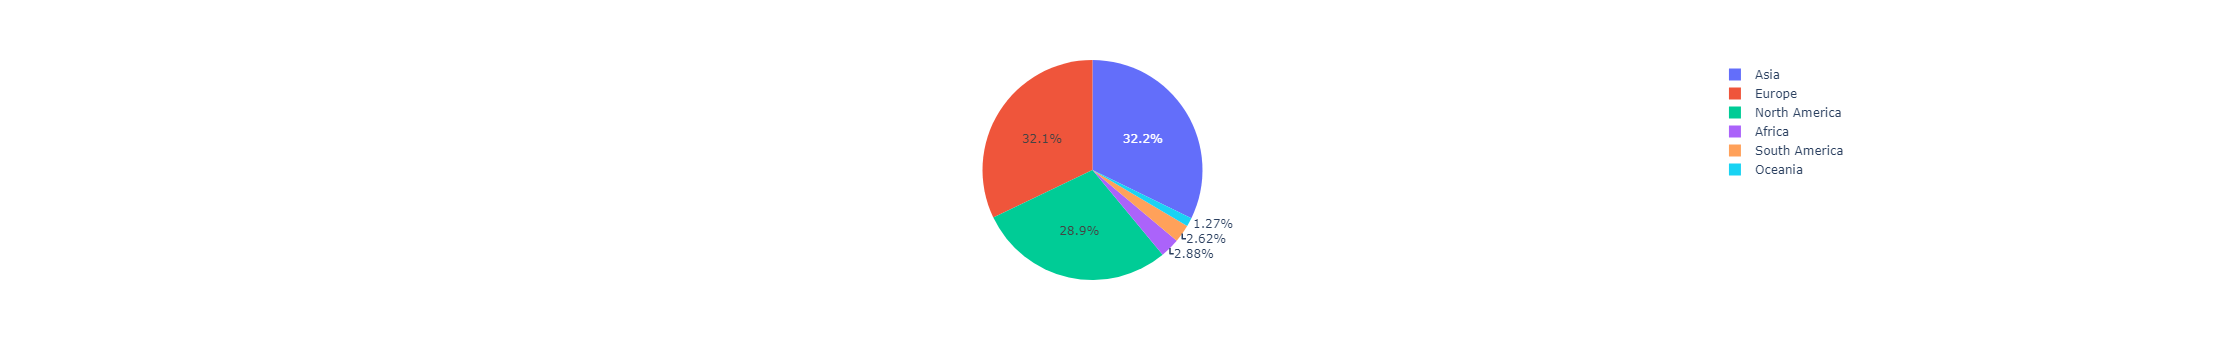

In [22]:
px.pie(continent_data, names='country', values='co2')

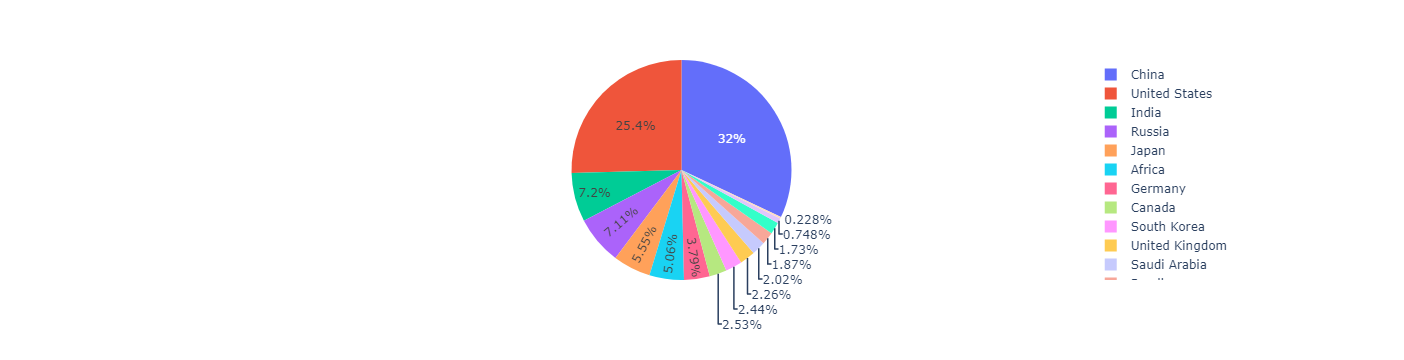

In [27]:
px.pie(final_df, names='country', values='co2')

Text(0, 0.5, 'CO2 measured in million tonnes')

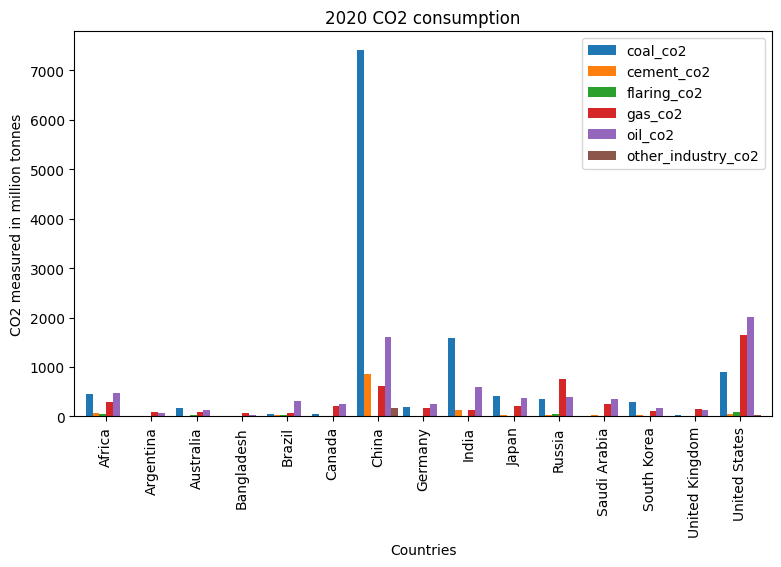

In [31]:
final_df_2020 = final_df[(final_df['year']==2020)]
final_df_2020
final_df_2020[['country','coal_co2','cement_co2','flaring_co2','gas_co2', 'oil_co2','other_industry_co2']].plot(x='country', kind='bar',figsize=(9,5),width=0.9)
plt.title('2020 CO2 consumption')
plt.xlabel('Countries')
plt.ylabel('CO2 measured in million tonnes')

Text(0, 0.5, 'CO2 measured in million tonnes')

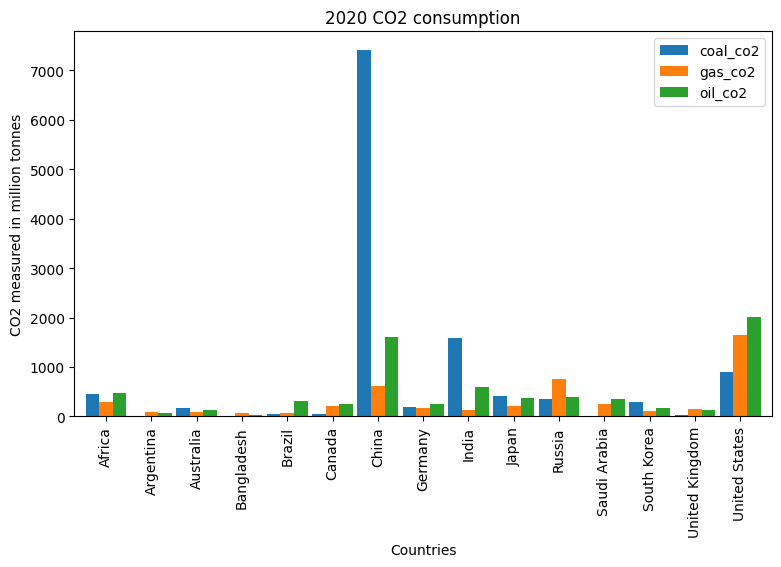

In [35]:
final_df_2020[['country','coal_co2','gas_co2', 'oil_co2']].plot(x='country', kind='bar',figsize=(9,5),width=0.9)
plt.title('2020 CO2 consumption')
plt.xlabel('Countries')
plt.ylabel('CO2 measured in million tonnes')

Text(0, 0.5, 'CO2 measured in million tonnes')

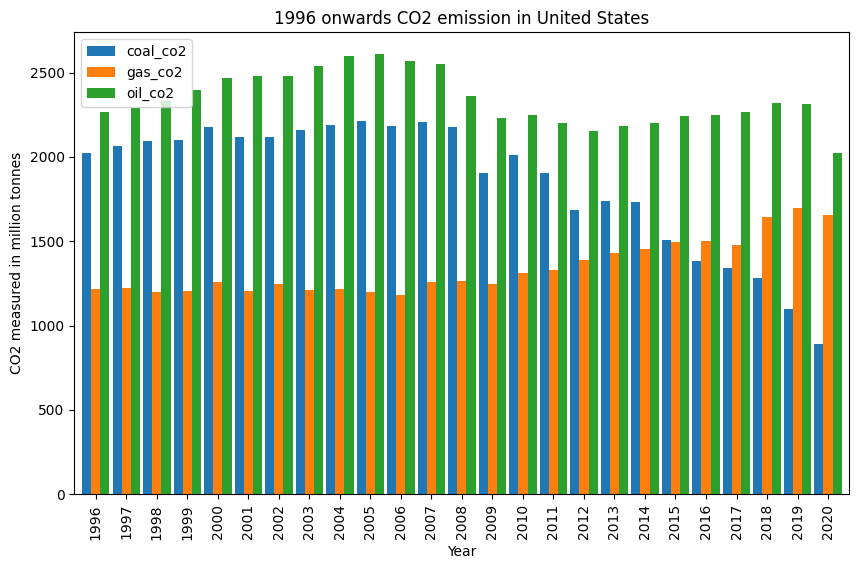

In [38]:
final_df_US = final_df[(final_df['country']=='United States')]
final_df_US[['year','coal_co2','gas_co2','oil_co2']].plot(x='year', kind='bar',figsize=(10,6),width=0.9)
plt.title('1996 onwards CO2 emission in United States')
plt.xlabel('Year')
plt.ylabel('CO2 measured in million tonnes')

Text(0, 0.5, 'CO2 measured in million tonnes')

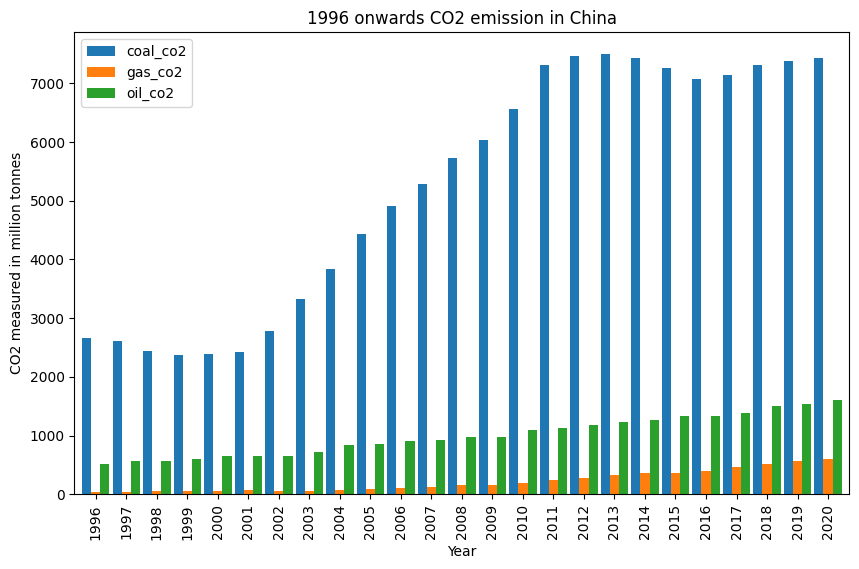

In [41]:
final_df_US = final_df[(final_df['country']=='China')]
final_df_US[['year','coal_co2','gas_co2','oil_co2']].plot(x='year', kind='bar',figsize=(10,6),width=0.9)
plt.title('1996 onwards CO2 emission in China')
plt.xlabel('Year')
plt.ylabel('CO2 measured in million tonnes')

Text(0, 0.5, 'CO2 measured in million tonnes')

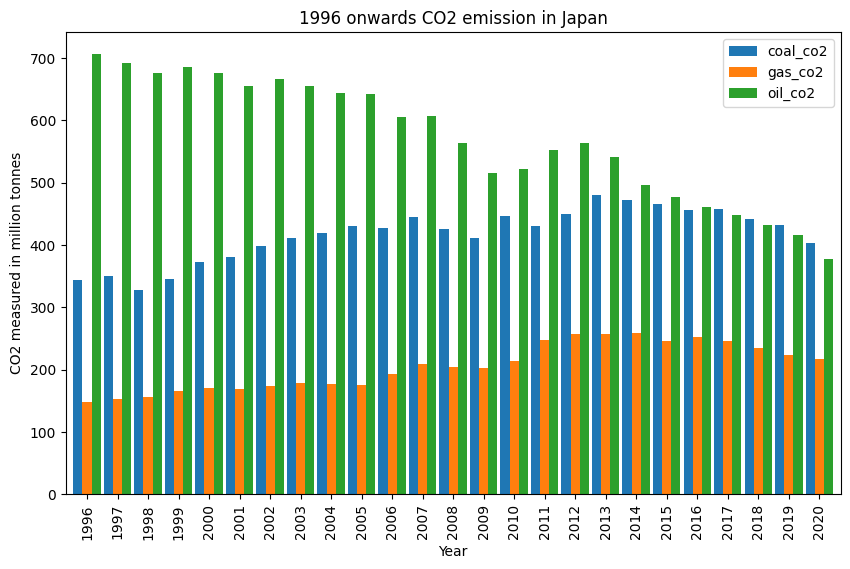

In [42]:
final_df_US = final_df[(final_df['country']=='Japan')]
final_df_US[['year','coal_co2','gas_co2','oil_co2']].plot(x='year', kind='bar',figsize=(10,6),width=0.9)
plt.title('1996 onwards CO2 emission in Japan')
plt.xlabel('Year')
plt.ylabel('CO2 measured in million tonnes')